In [1]:
include("../src.jl")

itproot

# Метод Ньютона и секущих

## Метод Ньютона-Рафсона

В методе Ньютона (также, Ньютона-Рафсона *Newton–Raphson method*) функция приближается прямой. Т.е. через текущее приближение корня $x_k$ проводится касательная $q(x)$ и корень касательной $q(x_{k+1}) = 0$ берётся за новое приближение.

Уравнение касательной в точке $x_k$  функции $f$ имеет вид

```{math}
q(x) = f(x_k) + f'(k) (x - x_k).
```

Откуда при $q(x) = 0$ получаем

```{proof:algorithm} Метод Ньютона поиска корня нелинейного уравнения
Пусть известна дифференциируемая функция $f$, её производная $f'$ и начальное приближение корня $x_1$, метод Ньютона заключается в построении приближений вида

$$
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}, \quad k = 1, 2, ....
$$
```

Метод Ньютона обладает квадратичной сходимостью для "хороших" функций. Сходимость может *не наблюдаться*, например, для немотононных функций или когда неудачно выбрано начальное приближение для корня.

% todo доказательство квадратичной сходимости

```{proof:definition} Квадратичная сходимость
Пусть последовательность приближений $x_k$ сходится к $x^*$. Если при этом для ошибки $\epsilon_k = x_k - x^*$ верно

$$
\lim_{k\to \infty}\frac{|\epsilon_{k+1}|}{|\epsilon_k|^2} = L > 0,
$$

то говорят, что последовательность обладает **сходится квадратично**.
```

```{proof:function} newton

**Метод Ньютона поиска корня нелинейного уравнения**

:::julia
"""
Решает уравнение вида `f`(x) = 0 методом Ньютона. Требует производную функцию `df` и
начальное приближение корня `x₁`. Выполняет не более `maxiter` итераций.
"""
function newton(f, df, x₁; maxiter=25, ftol=eps(), xtol=eps())
    x = float(x₁)
    for i in 1:maxiter
        fx = f(x)
        δx = - fx / df(x)
        x += δx

        abs(fx) < ftol && return x
        abs(δx) < xtol && return x
    end
    error("Число итераций превышено.")
end
:::
```

```{proof:demo} Метод Ньютона
```

```{raw} html
<div class="demo">
```

Пример для параболы $f(x) = -x (x-1)$.

In [2]:
f = (x) -> -x * (x-1)
df = (x) -> -2x + 1
r1 = newton(x -> -x^2 + x, x -> -2x + 1, 0.6; xtol=1e-6)
r2 = newton(x -> -x^2 + x, x -> -2x + 1, -0.5; xtol=1e-6)
@show r1 r2;

r1 = 1.0
r2 = -5.396595270071815e-16


Помимо того, что метод Ньютона плохо обусловлен для корней с нулевой производной, также можно привести случай расхождения метода.

Например, для кубического корня $f(x) = x^{1/3}$ и начального приближения $x_1 = 0.1$ получим следующую *расходящуюся* последовательность

```{math}
x_k = 0.1, \quad -0.2, \quad 0.4, \quad -0.8, \quad 1.6
```

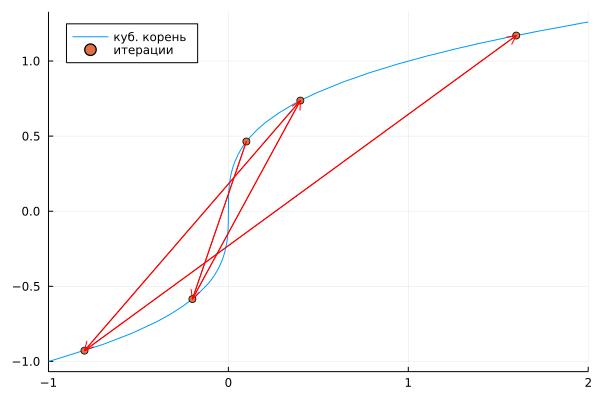

In [3]:
x = [0.1, -0.2, 0.4, -0.8, 1.6]
plt = plot(cbrt; xlim=(-1, 2), leg=:topleft, label="куб. корень")
scatter!(x, cbrt.(x); label="итерации")
@views for (a, b) in zip(x[1:end-1], x[2:end])
    plot!([a, b], cbrt.([a, b]); label="", arrow=true, linecolor=:red)
end
plt

```{raw} html
</div>
```

(chapter-nlroot-secant)=
## Метод секущих

Метод секущих основывается на интерполяции функции прямой. Пусть есть два приближения корня $x_1$ и $x_2$. Проведём секущую $q(x)$ через точки $(x_1, f(x_1))$ и $(x_2, f(x_2))$

```{math}
q(x) = f(x_1) + \frac{f(x_2) - f(x_1)}{x_2 - x_1} (x - x_1).
```

Новое приближение корня $x_3$ возьмём из пересечения секущей абсциссы $q(x_3) = 0$, откуда

```{math}
x_3 = x_1 - f(x_1)\frac{x_2 - x_1}{f(x_2) - f(x_1)} = \frac{f(x_2)x_1 - f(x_1)x_2}{f(x_2) - f(x_1)}.
```

```{proof:algorithm} Метод секущих
Пусть известны два приближения корня $x_{k-1}$ и $x_k$, следующее приближение корня вычисляется по формуле

$$
x_{k+1} = \frac{f(x_k)x_{k-1} - f(x_{k-1})x_k}{f(x_k) - f(x_{k-1})}, \quad k=2, 3, ....
$$

Таким образом, в этом методе секущие проводятся всегда по двум последним приближениям корня.
```

Метод секущих обладает сверхлинейной сходимостью со скоростью, равной золотому сечению $\alpha = (1 + \sqrt{5})/2 \approx 1.618$.

```{proof:definition} Сверхлинейная сходимость
Пусть последовательность приближений $x_k$ сходится к $x^*$. Если при этом для ошибки $\epsilon_k = x_k - x^*$ верно

$$
\lim_{k\to \infty}\frac{|\epsilon_{k+1}|}{|\epsilon_k|^\alpha} = L > 0,
$$

то говорят, что последовательность обладает **сверхлинейной сходимостью** со скоростью $\alpha \in (1, 2)$.
```

Метод секущих требует два начальных приближений вместо одного, но не требует вычисления производной. На практике важно время работы алгоритма и зачастую именно вычисление функции самое трудоёмкое. Поэтому наряду со скоростью сходимости метода вводят скорость сходимости *на вычисление* функции. Так, для метода Ньютона получим что за один шаг ошибка из $\epsilon_k = \delta$ станет $\epsilon_{k+1}=\delta^2$, но на это уходит два вычисления (функции и её производной), тогда на одно вычисление справедлива оценка $\delta^\sqrt{2}$. В это же время в методе секущих одна итерация требует одно вычисление, при этом ошибка уменьшается с $\delta$ на $\delta^{1.618}$. Поэтому в смысле сходимости за одно вычисление функции метод секущих оказывается быстрее.

```{proof:function} secant

**Метод секущих**

:::julia
"""
Ищет корень уравнения `f`(x) = 0 методом секущих, начиная с приближений `x₁`, `x₂`.
Выполняет не более `maxiter` итераций, пока не будет выполнено либо
|`x₁` - `x₂`| < `xtol`, либо |`f(x₂)`| < `ftol`.
"""
function secant(f, x₁, x₂; maxiter=25, ftol=eps(), xtol=eps())
    y₁ = f(x₁)
    for i in 1:maxiter
        y₂ = f(x₂)
        xnew = (y₂ * x₁ - y₁*x₂) / (y₂ - y₁)
        x₁, y₁ = x₂, y₂
        x₂ = xnew

        abs(y₂) < ftol && return x₂
        abs(x₂ - x₁) < xtol && return x₂
    end
    error("Число итераций превышено.")
end
:::
```

```{proof:demo} Метод секущих
```
```{raw} html
<div class="demo">
```

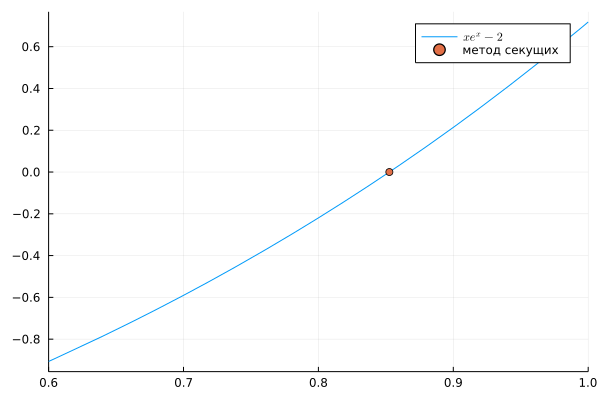

In [4]:
f = (x) -> x*exp(x) - 2
root = secant(f, 0, 1)
plot(f; xlim=(0.6, 1), label=L"xe^x - 2")
scatter!([root], [f(root)]; label="метод секущих")

```{raw} html
</div>
```